# Importing packages

In [1]:
%pip install optuna
%pip install lightgbm
%pip install shap==0.36

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Created wheel for shap: filename=shap-0.36.0-cp39-cp39-win_amd64.whl size=368389 sha256=b4b7c784376527415f10811915bc93844d902d9ad26ed9899df9ff17013d686a
  Stored in directory: c:\users\vishw\appdata\local\pip\cache\wheels\74\ad\b3\fc6d361d2e6bd73e6657d4ebbf3e706f224e5a9b6a103717dd
Successfully built shap
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing required libraries

import pandas as pd
import numpy as np
import plotly.graph_objects as go

import plotly.express as px
import matplotlib.pyplot as plt

#from ipywidgets import interact, interact_manual
#from IPython.core.display import display, HTML
#display (HTML ("<style>.container { width: 90% !important; }</style>"))
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering

import scipy.cluster.hierarchy as sch

import optuna

from optuna.samplers import TPESampler

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

from sklearn.cluster import DBSCAN

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb

from sklearn.metrics import log_loss

from plotly import _version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Loading data

In [5]:
df=pd.read_csv('C:\\Users\\vishw\\OneDrive\\Desktop\\Optimize product review\\SuperStore_Orders_Final.csv',encoding='latin-1')

In [6]:
#no of recoreds and no of features
print(df.shape[0])
print(df.shape[1])

51290
23


In [7]:
print(df['order_date'].min())
print(df['order_date'].max())

01-01-2011
31-12-2014


In [8]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Date_Diff,Customer_Feedback
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011,5,4
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011,7,2
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011,4,1
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011,4,1
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011,7,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           51290 non-null  object 
 1   order_date         51290 non-null  object 
 2   ship_date          51290 non-null  object 
 3   ship_mode          51290 non-null  object 
 4   customer_name      51290 non-null  object 
 5   segment            51290 non-null  object 
 6   state              51290 non-null  object 
 7   country            51290 non-null  object 
 8   market             51290 non-null  object 
 9   region             51290 non-null  object 
 10  product_id         51290 non-null  object 
 11  category           51290 non-null  object 
 12  sub_category       51290 non-null  object 
 13  product_name       51290 non-null  object 
 14  sales              51290 non-null  object 
 15  quantity           51290 non-null  int64  
 16  discount           512

In [10]:
#checking whether any null value are present or not
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales                0
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
Date_Diff            0
Customer_Feedback    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#converting order dat and ship date to datatime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

C:\Users\vishw\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\vishw\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\vishw\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\vishw\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\vishw\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '17-01-2011' in DD/MM/YYYY format. Pro

In [13]:
#creating helper columns
df['order_year'] = df['order_date'].dt.strftime('%Y')
df['order_month'] = df['order_date'].dt.strftime('%b')
df['order_week'] = df['order_date'].dt.strftime('%a')

In [14]:
df['OrderY']=df['order_date'].dt.year
df['OrderM']=df['order_date'].dt.month
df['OrderD']=df['order_date'].dt.day

In [15]:
df['OrderM']

0         1
1         1
2         1
3         1
4         1
         ..
51285    12
51286    12
51287    12
51288    12
51289    12
Name: OrderM, Length: 51290, dtype: int64

In [16]:
#processing the sales column 
df['sales'] = df['sales'].str.replace(',','')
df['sales'] = df['sales'].astype(float)

# numbers at category,sub_category,market,region,order_priority and quantity

In [17]:
Sales_agg = {'sales':['count','sum','min','max','mean','median','std']}
Profit_agg = {'profit':['count','sum','min','max','mean','median','std']}
Quantity_agg = {'quantity':['count','sum','min','max','mean','median','std']}

In [18]:
#numbers at Sales aggregation level
df_1 = ['category', 'sub_category','market','region','order_priority','quantity']
for i in df_1:
    display(df.groupby([i]).agg(Sales_agg).style.background_gradient(axis=0))

In [19]:
#numbers at Quantity aggregation level
df_1 = ['category', 'sub_category','market','region','order_priority','quantity']
for i in df_1:
    display(df.groupby([i]).agg(Quantity_agg).style.background_gradient(axis=0))

In [20]:
#numbers at Profit aggregation level
df_1 = ['category', 'sub_category','market','region','order_priority','quantity']
for i in df_1:
    display(df.groupby([i]).agg(Profit_agg).style.background_gradient(axis=0))

In [21]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [22]:
df['sub_category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [23]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [24]:
df[df['category']=='Office Supplies'].shape

(31273, 29)

In [25]:
df[df['category']=='Furniture'].shape

(9876, 29)

In [26]:
df[df['category']=='Technology'].shape

(10141, 29)

In [27]:
#maximum profit at category level
Category_profit=df.groupby(['category'])['profit'].max().reset_index()
Category_profit

,category,profit
0,Furniture,2316.510
1,Office Supplies,4946.370
2,Technology,8399.976


In [28]:
#maximum profit at category level
Category_sales=df.groupby(['category'])['sales'].max().reset_index()
Category_sales

,category,sales
0,Furniture,5760.0
1,Office Supplies,9893.0
2,Technology,22638.0


<AxesSubplot:xlabel='category', ylabel='sales'>

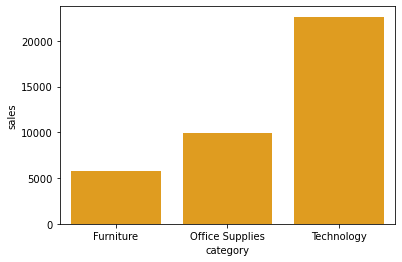

In [29]:
sns.barplot(x='category',y='sales',data=Category_sales,color='orange')

<AxesSubplot:xlabel='category', ylabel='profit'>

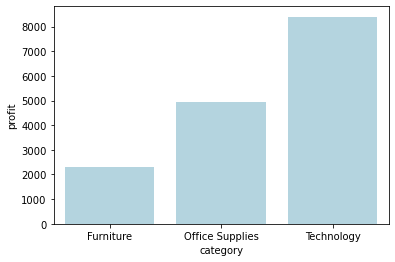

In [30]:
sns.barplot(x='category',y='profit',data=Category_profit,color='lightblue')

In [31]:
#visulaising subcategory level Sales 
sub_category_Sales=df.groupby('sub_category')['sales'].sum().sort_values(ascending=False).reset_index()
sub_category_Sales

,sub_category,sales
0,Phones,1706874.0
1,Copiers,1509439.0
2,Chairs,1501682.0
3,Bookcases,1466559.0
4,Storage,1127124.0
5,Appliances,1011081.0
6,Machines,779071.0
7,Tables,757034.0
8,Accessories,749307.0
9,Binders,461952.0


<AxesSubplot:xlabel='sub_category', ylabel='sales'>

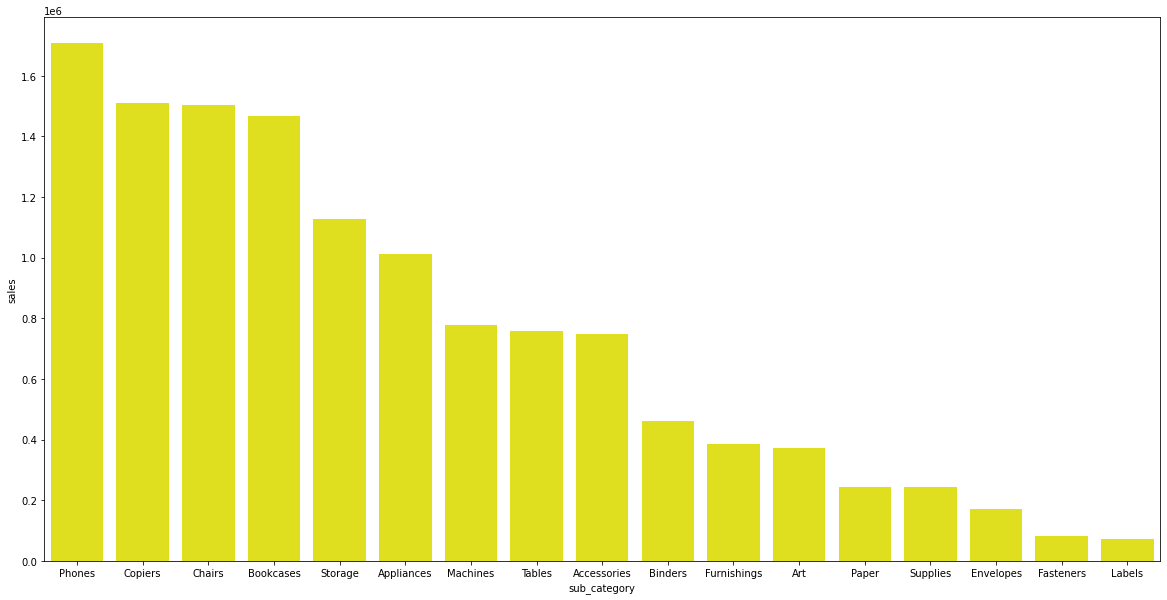

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='sub_category',y='sales',data=sub_category_Sales,color='yellow',ax=ax)

In [33]:
#visulaising subcategory level Profits 
sub_category_profits=df.groupby('sub_category')['profit'].sum().sort_values(ascending=False).reset_index()
sub_category_profits

,sub_category,profit
0,Copiers,258567.54818
1,Phones,216717.00580
2,Bookcases,161924.41950
3,Chairs,141973.79750
4,Appliances,141680.58940
5,Accessories,129626.30620
6,Storage,108461.48980
7,Binders,72449.84600
8,Paper,59207.68270
9,Machines,58867.87300


<AxesSubplot:xlabel='sub_category', ylabel='profit'>

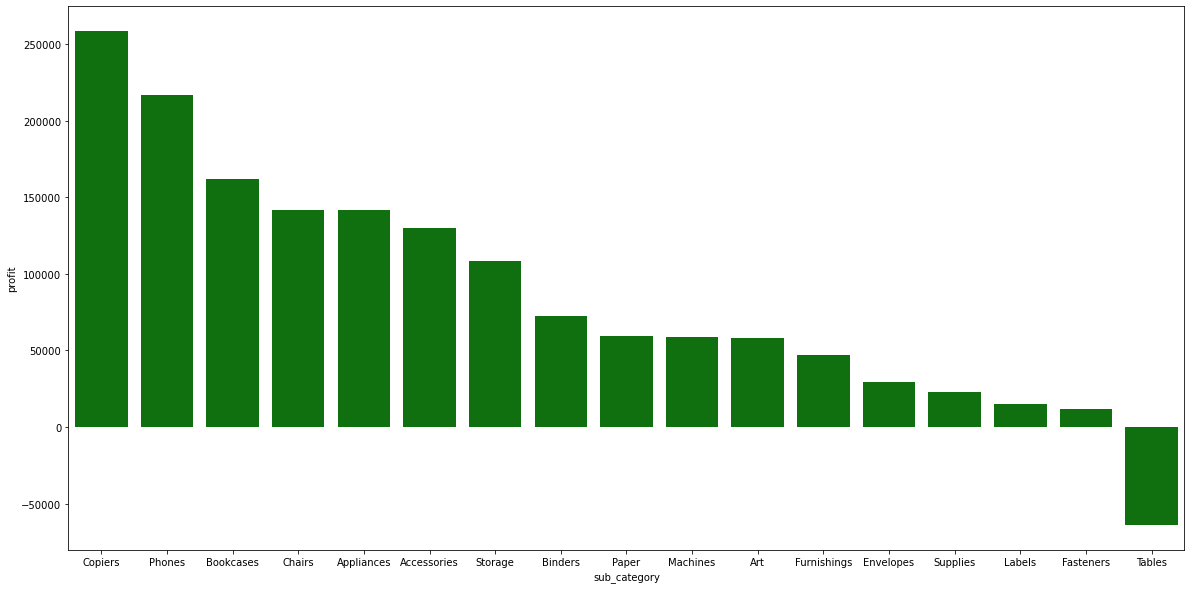

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='sub_category',y='profit',data=sub_category_profits,color='green',ax=ax)

In [35]:
final_df=df.groupby(['category','OrderY','OrderM']).agg({'sales':sum,'profit':sum}).reset_index()

In [36]:
final_df.columns

Index(['category', 'OrderY', 'OrderM', 'sales', 'profit'], dtype='object')

In [37]:
final_df.sample(10)

,category,OrderY,OrderM,sales,profit
131,Technology,2013,12,133340.0,18304.77300
14,Furniture,2012,3,69550.0,3770.26810
117,Technology,2012,10,96045.0,15222.66564
51,Office Supplies,2011,4,40516.0,4941.76630
97,Technology,2011,2,50755.0,7400.13376
99,Technology,2011,4,44066.0,5714.02424
126,Technology,2013,7,86191.0,9909.20344
37,Furniture,2014,2,85918.0,9409.15360
127,Technology,2013,8,117011.0,14400.95116
38,Furniture,2014,3,115639.0,14208.29750


# Checking Correlation and Multicollinearity

In [38]:
def corr_to_df(data, threshold):
    corr_result=data.corr()
    corr=corr_result[(corr_result != 1.0)&((corr_result > threshold) | (corr_result < -1*threshold))] 
    return pd.DataFrame(corr.unstack().dropna ().sort_values (ascending = False) .drop_duplicates())

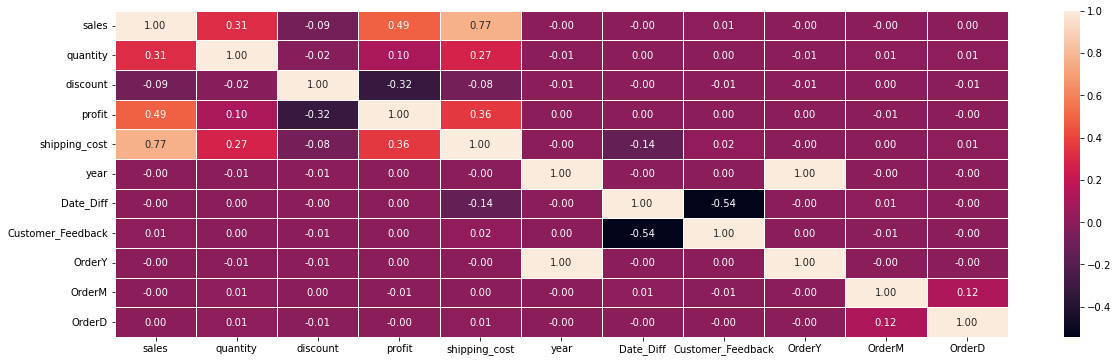

In [39]:
df_corr= corr_to_df(df, 0.7)
corr=df.corr()
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap (corr, annot = True, fmt='1.2f', annot_kws={'size':10}, linewidth = 1)
plt.show()

In [40]:
df_corr.sample()

,,0
sales,shipping_cost,0.768075


In [41]:
# #VIF
# vif_data = pd.DataFrame()

# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
# #data_vif = data_filtered_cor.select_dtypes (include-numerics), fillna(0)
# vif_data["feature"] = df.columns 
# vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
# display(vif_data.sort_values('VIF', ascending=False))

# spliting final_df for different category level model building

In [42]:
#category at Technology level
df_technology=final_df[final_df['category']=='Technology'].reset_index(drop=True)
df_technology.head(10)

,category,OrderY,OrderM,sales,profit
0,Technology,2011,1,45387.0,7991.51872
1,Technology,2011,2,50755.0,7400.13376
2,Technology,2011,3,74107.0,7712.63572
3,Technology,2011,4,44066.0,5714.02424
4,Technology,2011,5,55802.0,7120.80592
5,Technology,2011,6,62914.0,10903.94156
6,Technology,2011,7,59283.0,5473.29196
7,Technology,2011,8,77565.0,5970.91144
8,Technology,2011,9,91758.0,10781.37458
9,Technology,2011,10,82643.0,15943.27416


In [43]:
#category at Furniture level
df_Furniture=final_df[final_df['category']=='Furniture'].reset_index(drop=True)
df_Furniture.head(10)

,category,OrderY,OrderM,sales,profit
0,Furniture,2011,1,46816.0,575.2815
1,Furniture,2011,2,49980.0,5370.5823
2,Furniture,2011,3,53749.0,3126.9520
3,Furniture,2011,4,44261.0,2749.6787
4,Furniture,2011,5,37744.0,1320.1193
5,Furniture,2011,6,70539.0,5084.2551
6,Furniture,2011,7,46079.0,4146.4408
7,Furniture,2011,8,79951.0,3940.2078
8,Furniture,2011,9,77031.0,6061.0097
9,Furniture,2011,10,69020.0,8216.8340


In [44]:
#category at Office Supplies level
df_Office_Supplies=final_df[final_df['category']=='Office Supplies'].reset_index(drop=True)
df_Office_Supplies.head(10)

,category,OrderY,OrderM,sales,profit
0,Office Supplies,2011,1,46042.0,4890.4328
1,Office Supplies,2011,2,34234.0,4818.1212
2,Office Supplies,2011,3,43589.0,5329.7729
3,Office Supplies,2011,4,40516.0,4941.7663
4,Office Supplies,2011,5,54612.0,6336.5327
5,Office Supplies,2011,6,55886.0,9944.6813
6,Office Supplies,2011,7,56677.0,1012.1113
7,Office Supplies,2011,8,61720.0,9739.5520
8,Office Supplies,2011,9,86461.0,15470.8703
9,Office Supplies,2011,10,53016.0,6585.4335
